# Step 1:  Import Libraries 

In [75]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from shapely.geometry import Point
from sklearn.cluster import KMeans

# Step 2: Import Dataset

In [76]:
df = pd.read_csv('Dataset .csv')

# Step 3:  Data Exploration 

In [43]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [16]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Step 3: Data Cleaning 

# If there are missing values or outliers in the data, it is necessary to clean them.

In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(9542, 21)

# Step 4 : Data Visualization

# Top Cuisines

# Q1: Determine the top three most common cuisines in the dataset.( bar graph) 

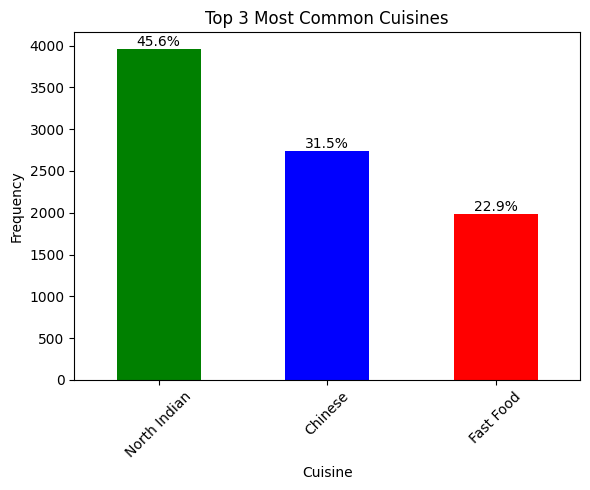

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it is already loaded

# Split the Cuisines column and count occurrences
cuisine_series = df['Cuisines'].str.split(', ').explode()
top_cuisines = cuisine_series.value_counts().head(3)

# Bar plot for top 3 most common cuisines
plt.figure(figsize=(6, 5))
bars = top_cuisines.plot(kind='bar', color=['green', 'blue', 'red'])

# Percentage calculation and annotation
total = top_cuisines.sum()
for bar in bars.patches:  # Use bars.patches to get the bar objects
    yval = bar.get_height()
    percentage = (yval / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{percentage:.1f}%', ha='center', va='bottom')

# Graph modification 
plt.title('Top 3 Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Q2: Calculate the percentage ofrestaurants that serve each of the top cuisines.(PIE Chart)

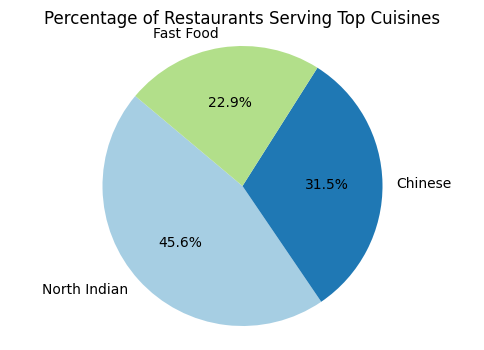

In [78]:
# Percentage calculation
percentages = (top_cuisines / len(df)) * 100

# Pie chart for top cuisines
plt.figure(figsize=(6, 4))
plt.pie(percentages, labels=top_cuisines.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of Restaurants Serving Top Cuisines')
plt.axis('equal')

# Show the plot
plt.show()


# City Analysis

# Q1: Identify the city with the highest number of restaurants in the dataset.

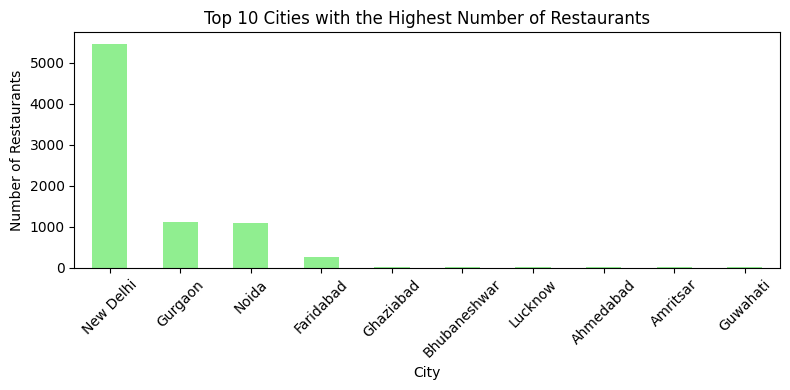

In [72]:

# Step 1: Count the number of restaurants per city
city_counts = df['City'].value_counts()

# Step 2: Bar chart for the top 10 cities
plt.figure(figsize=(8, 4))
city_counts.head(10).plot(kind='bar', color='lightgreen')  # Use head(10) for top 10 cities
plt.title('Top 10 Cities with the Highest Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Calculate the average rating for restaurants in each city.

In [54]:
# Calculate the average rating for restaurants in each city
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().reset_index()
# Rename the columns for better understanding
average_rating_by_city.columns = ['City', 'Average Rating']
# Display the result with all columns
print(average_rating_by_city)



                City  Average Rating
0          Abu Dhabi        4.300000
1               Agra        3.965000
2          Ahmedabad        4.161905
3             Albany        3.555000
4          Allahabad        3.395000
..               ...             ...
136          Weirton        3.900000
137  Wellington City        4.250000
138   Winchester Bay        3.200000
139          Yorkton        3.300000
140        ��stanbul        4.292857

[141 rows x 2 columns]


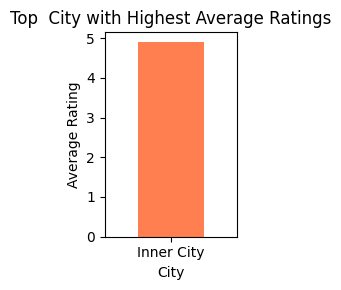

In [55]:

# City ke hisaab se average rating calculate karna
average_rating_per_city = df.groupby('City')['Aggregate rating'].mean()

# Bar graph plot karna
plt.figure(figsize=(2, 3))
average_rating_per_city.sort_values(ascending=False).head(1).plot(kind='bar', color='coral')
plt.title('Top  City with Highest Average Ratings')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()


# Price Range Distribution 

# Q1: Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

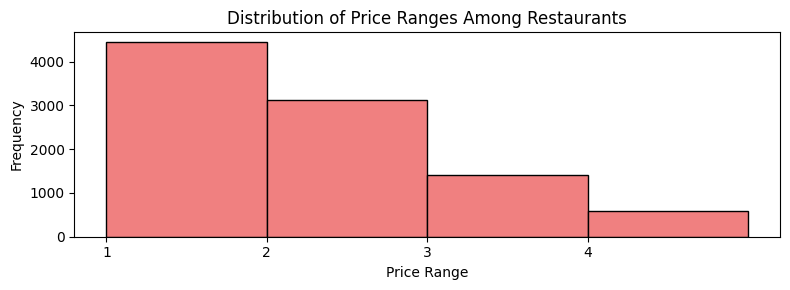

In [56]:
# Histogram plot karna
plt.figure(figsize=(8, 3))
plt.hist(df['Price range'], bins=range(1, df['Price range'].max() + 2), color='lightcoral', edgecolor='black')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(range(1, df['Price range'].max() + 1))
plt.tight_layout()
plt.show()


# Q2: Calculate the percentage of restaurants in each price range category.

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


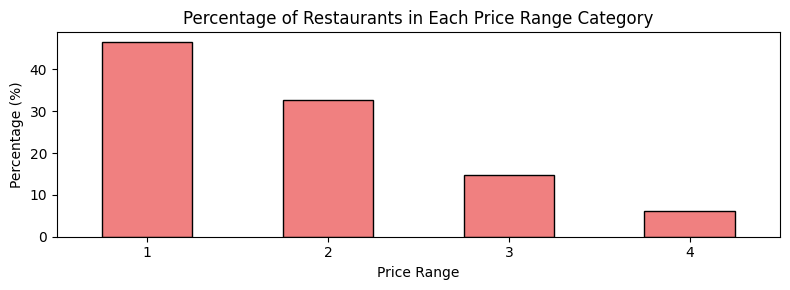

In [57]:

# Percentage calculate 
price_range_percentage = (df['Price range'].value_counts() /  df.shape[0]) * 100

# Result
print(price_range_percentage)

# Bar graph
plt.figure(figsize=(8, 3))
price_range_percentage.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Percentage of Restaurants in Each Price Range Category')
plt.xlabel('Price Range')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Online Delivery


# Q1: Determine the percentage of restaurants that offer online delivery.

Percentage of restaurants that offer online delivery: 25.66%


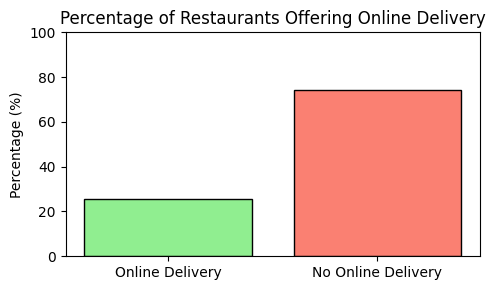

In [79]:

# Percentage calculate 
online_delivery_percentage = (df[df['Has Online delivery'] == 'Yes'].shape[0]/ df.shape[0]) * 100

# Result  print 
print(f"Percentage of restaurants that offer online delivery: {online_delivery_percentage:.2f}%")

# Data for plotting
labels = ['Online Delivery', 'No Online Delivery']
values = [online_delivery_percentage, 100 - online_delivery_percentage]

# Bar graph plot 
plt.figure(figsize=(5, 3))
plt.bar(labels, values, color=['lightgreen', 'salmon'], edgecolor='black')
plt.title('Percentage of Restaurants Offering Online Delivery')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Q2:  Compare the average ratings of restaurants with and without online delivery.

Average Rating (With Online Delivery): 3.25
Average Rating (Without Online Delivery): 2.47


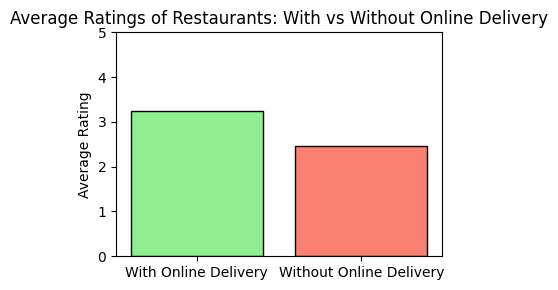

In [59]:


# Online delivery wale aur nahi wale restaurants ka average rating 
average_rating_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
average_rating_no_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

# Print average ratings
print(f"Average Rating (With Online Delivery): {average_rating_delivery:.2f}")
print(f"Average Rating (Without Online Delivery): {average_rating_no_delivery:.2f}")

# Data for plotting
labels = ['With Online Delivery', 'Without Online Delivery']
average_ratings = [average_rating_delivery, average_rating_no_delivery]

# Bar graph plot 
plt.figure(figsize=(4, 3))
plt.bar(labels, average_ratings, color=['lightgreen', 'salmon'], edgecolor='black')
plt.title('Average Ratings of Restaurants: With vs Without Online Delivery')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Assuming the rating is on a scale of 0 to 5
plt.tight_layout()
plt.show()




# Restaurant Ratings

# Q1: Analyze the distribution of aggregate ratings and determine the most common rating range.

In [73]:
# Calculate average ratings for restaurants with and without online delivery
average_rating_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
average_rating_no_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

# Print average ratings
print(f"Average Rating (With Online Delivery): {average_rating_delivery:.2f}")
print(f"Average Rating (Without Online Delivery): {average_rating_no_delivery:.2f}")

# Calculate frequency of rating ranges
rating_bins = [0, 1, 2, 3, 4, 5]  # Define bins for ratings
df['Rating Range'] = pd.cut(df['Aggregate rating'], bins=rating_bins, right=False)  # Create rating ranges
rating_range_counts = df['Rating Range'].value_counts().sort_index()  # Count occurrences in each range

# Print frequency of rating ranges
print("\nFrequency of Rating Ranges:")
print(rating_range_counts)

# Determine the most common rating range
most_common_range = rating_range_counts.idxmax()
most_common_count = rating_range_counts.max()

print(f"\nMost Common Rating Range: {most_common_range} (Count: {most_common_count})")


Average Rating (With Online Delivery): 3.25
Average Rating (Without Online Delivery): 2.47

Frequency of Rating Ranges:
Rating Range
[0, 1)    2148
[1, 2)       3
[2, 3)    1430
[3, 4)    4590
[4, 5)    1380
Name: count, dtype: int64

Most Common Rating Range: [3, 4) (Count: 4590)


# Q2: Calculate the average number of votes received by restaurants.

In [74]:
import pandas as pd

# Calculate average ratings for restaurants with and without online delivery
average_rating_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
average_rating_no_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

# Calculate average votes
average_votes = df['Votes'].mean()  # Calculate average votes

# Print average ratings
print(f"Average Rating (With Online Delivery): {average_rating_delivery:.2f}")
print(f"Average Rating (Without Online Delivery): {average_rating_no_delivery:.2f}")

# Print average votes
print(f"Average number of votes received by restaurants: {average_votes:.2f}")


Average Rating (With Online Delivery): 3.25
Average Rating (Without Online Delivery): 2.47
Average number of votes received by restaurants: 156.91


# Cuisine Combination

# Q1: Identify the most common combinations of cuisines in the dataset.

Most Common Cuisines:
North Indian: 3960
Chinese: 2735
Fast Food: 1986
Mughlai: 995
Italian: 764
Bakery: 745
Continental: 736
Cafe: 703
Desserts: 653
South Indian: 636


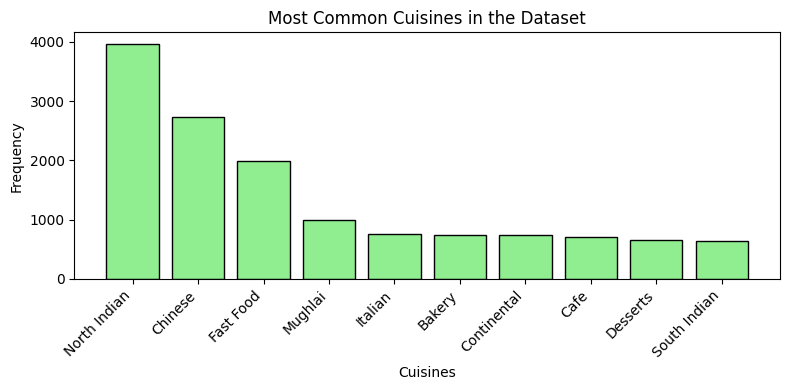

In [64]:
#define counter 
from collections import Counter
# Cuisines ko list mein convert karna 
cuisines_list = df['Cuisines'].dropna().str.split(',').tolist()

# Cuisines ko flatten karna aur whitespace hataana
flattened_cuisines = [cuisine.strip() for sublist in cuisines_list for cuisine in sublist]

# Frequency count karna
cuisine_counts = Counter(flattened_cuisines)

# Most common combinations nikaalna
most_common_cuisines = cuisine_counts.most_common(10)  # Top 10 combinations

# Result ko print karna
print("Most Common Cuisines:")
for cuisine, count in most_common_cuisines:
    print(f"{cuisine}: {count}")
    
# Data for plotting
labels, values = zip(*most_common_cuisines)

# Bar graph plot karna
plt.figure(figsize=(8, 4))
plt.bar(labels, values, color= 'lightgreen' , edgecolor='black')
plt.title('Most Common Cuisines in the Dataset')
plt.xlabel('Cuisines')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # X-axis labels ko rotate karna
plt.tight_layout()
plt.show()


# Q2:Determine if certain cuisine combination stend to have higher ratings.

In [65]:
from collections import defaultdict
from itertools import combinations

# Cuisines ko list mein convert karna
cuisines_list = df['Cuisines'].dropna().str.split(',').tolist()

# Dictionary to hold sum of ratings and count of restaurants for each combination
cuisine_ratings = defaultdict(lambda: {'total_rating': 0, 'count': 0})

# Cuisines combinations ka analyze karna
for index, cuisines in enumerate(cuisines_list):
    # Whitespace hataana
    cuisines = [cuisine.strip() for cuisine in cuisines]
    # Generate combinations of cuisines
    for r in range(2, len(cuisines) + 1):  # Pair or more
        for combo in combinations(cuisines, r):
            combo_key = ', '.join(sorted(combo))  # Sorting for consistent keys
            cuisine_ratings[combo_key]['total_rating'] += df['Aggregate rating'].iloc[index]
            cuisine_ratings[combo_key]['count'] += 1

# Average ratings calculate karna
average_ratings = {combo: values['total_rating'] / values['count'] for combo, values in cuisine_ratings.items() if values['count'] > 0}

# Most common combinations with average rating
sorted_average_ratings = sorted(average_ratings.items(), key=lambda x: x[1], reverse=True)

# Displaying the top combinations with average ratings
print("Top Cuisine Combinations with Average Ratings:")
for combo, avg_rating in sorted_average_ratings[:10]:  # Top 10 combinations
    print(f"{combo}: {avg_rating:.2f}")
    

Top Cuisine Combinations with Average Ratings:
European, Indian: 4.90
Asian, European, Indian: 4.90
International, Sushi: 4.90
American, International, Sushi: 4.90
BBQ, Bar Food: 4.90
American, BBQ, Bar Food: 4.90
Australian, Modern Australian: 4.90
Indian, Mughlai, South Indian: 4.90
Biryani, Indian, South Indian: 4.90
Biryani, Mughlai, South Indian: 4.90


# Geographic Analysis

# Q1: Plot the locations of restaurants on a map using longitude and latitude coordinates.

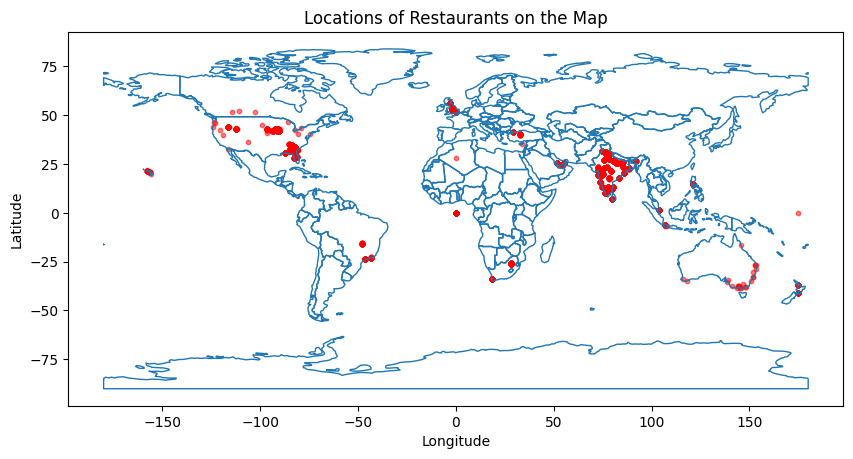

In [80]:

from shapely.geometry import Point

# Longitude aur Latitude se Point objects create karna
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# World map load karna
world = gpd.read_file(r'C:\Users\hp\Downloads\110m_cultural/ne_110m_admin_0_countries.shp')
# Plot karna
fig, ax = plt.subplots(figsize=(10, 5))
world.boundary.plot(ax=ax, linewidth=1)
geo_df.plot(ax=ax, color='red', markersize=10, alpha=0.5)

plt.title('Locations of Restaurants on the Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Q2: Identify any patterns or clusters of restaurants in specific areas.

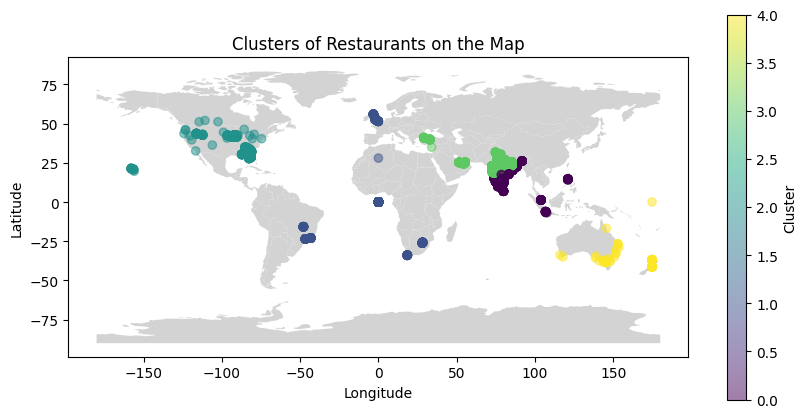

In [67]:
from shapely.geometry import Point
from sklearn.cluster import KMeans

# Longitude aur Latitude se Point objects create karna
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# K-means clustering
kmeans = KMeans(n_clusters=5) # ---->  cluster count 
df['cluster'] = kmeans.fit_predict(df[['Longitude', 'Latitude']])

# Plot karna
fig, ax = plt.subplots(figsize=(10, 5))
gpd.read_file(r'C:\Users\hp\Downloads\110m_cultural/ne_110m_admin_0_countries.shp').plot(ax=ax, color='lightgrey')  # World map
scatter = ax.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='viridis', marker='o', alpha=0.5)

plt.title('Clusters of Restaurants on the Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Cluster')
plt.show()


# Restaurant Chains

# Q1. Identify if there are any restaurant chains present in the dataset

In [68]:
# Restaurant names ka count 
restaurant_counts = df['Restaurant Name'].value_counts()

# Filter karna sirf un restaurants ko jo zyada than 1 location pe hain (chains)
restaurant_chains = restaurant_counts[restaurant_counts > 1]

# Print karna identified restaurant chains
print("Restaurant Chains in the Dataset:")
print(restaurant_chains)


Restaurant Chains in the Dataset:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
San Carlo            2
Gymkhana             2
Dishoom              2
Timboo Cafe          2
D�_vero��lu          2
Name: count, Length: 734, dtype: int64


# Q2: Analyze the ratings and popularity of different restaurant chains.

In [69]:
# Restaurant chains ko identify karna
restaurant_counts = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1].index

# Filter karna sirf restaurant chains ko
chains_df = df[df['Restaurant Name'].isin(restaurant_chains)]

# Average rating aur total votes nikalna for each chain
chain_analysis = chains_df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',  # Average rating
    'Votes': 'sum'               # Total votes (popularity)
}).sort_values(by='Aggregate rating', ascending=False)

# Print karna analysis
print("Restaurant Chains - Ratings and Popularity Analysis:")
print(chain_analysis) 

Restaurant Chains - Ratings and Popularity Analysis:
                           Aggregate rating  Votes
Restaurant Name                                   
Talaga Sampireun                      4.900   5514
Silantro Fil-Mex                      4.850   1364
AB's Absolute Barbecues               4.850   3151
AB's - Absolute Barbecues             4.825  13400
Naturals Ice Cream                    4.800   3094
...                                     ...    ...
Kake Da Dhaba                         0.000      2
Bake Walkers                          0.000      0
Kettle & Kegs                         0.000      5
Kesarwa Bakez                         0.000      3
Aap Ki Khatir                         0.000      0

[734 rows x 2 columns]


# Restaurant Reviews

# Q1: Identify the restaurants with the highest and lowest number of votes.

In [8]:
# Find the restaurant with the highest number of votes
restaurant_max_votes = df.loc[df['Votes'].idxmax()]

# Find the restaurant with the lowest number of votes
restaurant_min_votes = df.loc[df['Votes'].idxmin()]

# Display the results
print("Restaurant with the Highest Number of Votes:")
print(restaurant_max_votes[['Restaurant Name', 'Votes']])

print("\nRestaurant with the Lowest Number of Votes:")
print(restaurant_min_votes[['Restaurant Name', 'Votes']])


Restaurant with the Highest Number of Votes:
Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object

Restaurant with the Lowest Number of Votes:
Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object


# Q2: Analyze if there is a correlation between the number of votes and the rating of a restaurant.

Correlation between Number of Votes and Aggregate Rating: 0.31


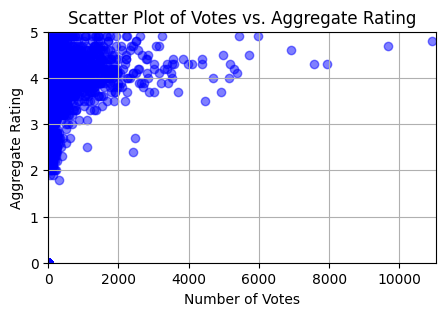

In [70]:

# Calculate the correlation coefficient
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"Correlation between Number of Votes and Aggregate Rating: {correlation:.2f}")

# Create a scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Votes vs. Aggregate Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.xlim(0, df['Votes'].max() + 100)  # Add some space to the right
plt.ylim(0, 5)  # Assuming ratings are between 0 and 5
plt.grid(True)
plt.show()


# Price Range vs. Online Delivery and Table Booking

# Q1: Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
df = pd.read_csv('Dataset .csv')
# Convert 'Has Online delivery' and 'Has Table booking' to numerical values for analysis
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

# Group by price range and calculate the counts for online delivery
online_delivery_counts = df.groupby(['Price range', 'Has Online delivery']).size().unstack(fill_value=0)

# Group by price range and calculate the counts for table booking
table_booking_counts = df.groupby(['Price range', 'Has Table booking']).size().unstack(fill_value=0)

# Perform Chi-Square test for Online Delivery
chi2_online, p_online, dof_online, expected_online = chi2_contingency(online_delivery_counts)
print(f"Chi-Square Test for Online Delivery: Chi2 = {chi2_online:.2f}, p-value = {p_online:.4f}")

# Perform Chi-Square test for Table Booking
chi2_table, p_table, dof_table, expected_table = chi2_contingency(table_booking_counts)
print(f"Chi-Square Test for Table Booking: Chi2 = {chi2_table:.2f}, p-value = {p_table:.4f}")

# Create subplots for visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Bar graph for online delivery
online_delivery_counts.plot(kind='bar', ax=ax[0], color=['lightgreen', 'lightcoral'])
ax[0].set_title('Online Delivery Availability by Price Range')
ax[0].set_xlabel('Price Range')
ax[0].set_ylabel('Number of Restaurants')
ax[0].legend(['No', 'Yes'])
ax[0].set_xticklabels(online_delivery_counts.index, rotation=0)

# Bar graph for table booking
table_booking_counts.plot(kind='bar', ax=ax[1], color=['lightblue', 'salmon'])
ax[1].set_title('Table Booking Availability by Price Range')
ax[1].set_xlabel('Price Range')
ax[1].set_ylabel('Number of Restaurants')
ax[1].legend(['No', 'Yes'])
ax[1].set_xticklabels(table_booking_counts.index, rotation=0)

# Display the plots
plt.tight_layout()
plt.show()


# Q2: Determine if higher-priced restaurants are more likely to offer these services.

In [40]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv('Dataset .csv')
# Convert 'Has Online delivery' and 'Has Table booking' to numerical values for analysis
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

# Group by price range and calculate the counts for online delivery
online_delivery_counts = df.groupby(['Price range', 'Has Online delivery']).size().unstack(fill_value=0)

# Group by price range and calculate the counts for table booking
table_booking_counts = df.groupby(['Price range', 'Has Table booking']).size().unstack(fill_value=0)

# Calculate the percentages for online delivery
online_delivery_percentage = online_delivery_counts.div(online_delivery_counts.sum(axis=1), axis=0) * 100
print("\nPercentage of Restaurants Offering Online Delivery by Price Range:")
print(online_delivery_percentage)

# Calculate the percentages for table booking
table_booking_percentage = table_booking_counts.div(table_booking_counts.sum(axis=1), axis=0) * 100
print("\nPercentage of Restaurants Offering Table Booking by Price Range:")
print(table_booking_percentage)

# Perform Chi-Square test for Online Delivery
chi2_online, p_online, dof_online, expected_online = chi2_contingency(online_delivery_counts)
print(f"\nChi-Square Test for Online Delivery: Chi2 = {chi2_online:.2f}, p-value = {p_online:.4f}")

# Perform Chi-Square test for Table Booking
chi2_table, p_table, dof_table, expected_table = chi2_contingency(table_booking_counts)
print(f"Chi-Square Test for Table Booking: Chi2 = {chi2_table:.2f}, p-value = {p_table:.4f}")



Percentage of Restaurants Offering Online Delivery by Price Range:
Has Online delivery          0          1
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

Percentage of Restaurants Offering Table Booking by Price Range:
Has Table booking          0          1
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679

Chi-Square Test for Online Delivery: Chi2 = 721.38, p-value = 0.0000
Chi-Square Test for Table Booking: Chi2 = 2821.58, p-value = 0.0000
